In [3]:
#Import Libraries

#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore,normaltest

#Preprocess
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

#Encoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#TrainTestSplit
from sklearn.model_selection import train_test_split,cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Optimize
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

#Joblib
import joblib

%matplotlib inline

In [4]:
#Import data
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
#Check Head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Check Info
df.info()
#As we can see that there are no null values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Check for single valued columns
for x in df.columns:
    if df.loc[:,x].nunique()==1:
        print(x)
#As we can see there are three single valued columns which we can directly drop

EmployeeCount
Over18
StandardHours


In [8]:
df=df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)

In [9]:
#Our taret will be Attrition
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
#Check correlation in data
df.corr()
#As we can see that there is no column of attrition as it is not of integer datatype

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [11]:
#Encode Attrition
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [12]:
#Check Head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


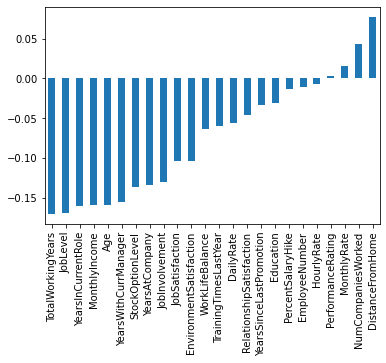

In [13]:
#Check correlation by plotting
df.corr()['Attrition'].sort_values().drop('Attrition').plot(kind='bar')

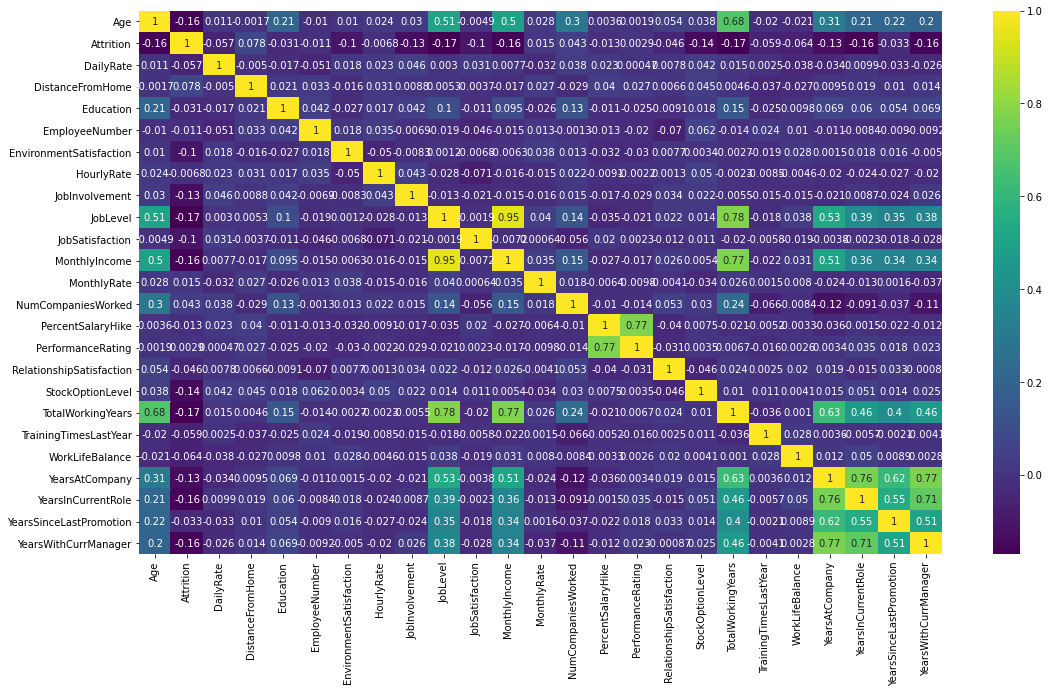

In [14]:
#Plot heatmap for correlation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

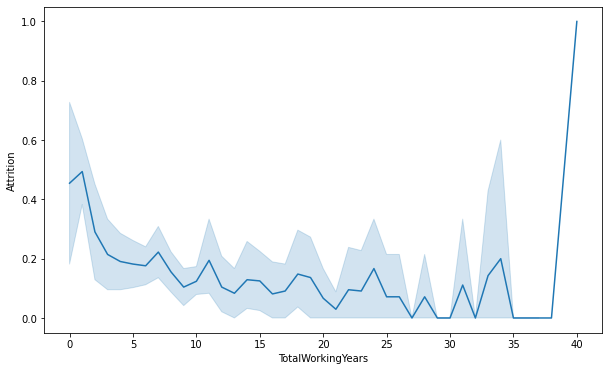

In [15]:
#The most correlated feature with Attrition is TotalWorkingYears which seems to be logical also
plt.figure(figsize=(10,6))
sns.lineplot(x='TotalWorkingYears',y='Attrition',data=df)
plt.show()
#We can see that possibility of the employees leaving the company is maximum between 0-3 years or after 35

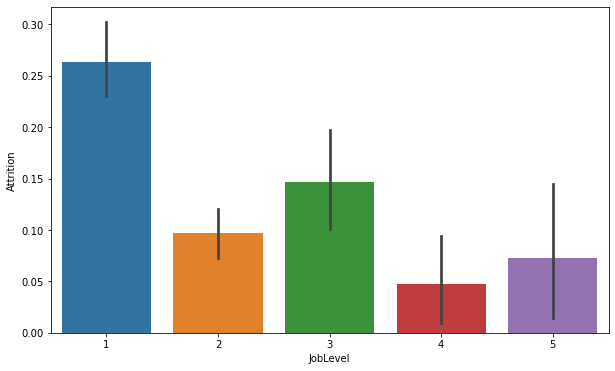

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobLevel',y='Attrition',data=df)
plt.show()
#Max possibility of Attrition is for JobLevel 1

In [17]:
#Check Skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [18]:
#Check info and encode object Dtype columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [19]:
#Encode Business Travel
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [20]:
#Create instance of class
oe=OneHotEncoder()

In [21]:
df_bt=oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1)).toarray()

In [22]:
df_bt=pd.DataFrame(df_bt,columns=('Business_Travel_'+str(x) for x in range(df_bt.shape[1])))

In [23]:
df=df.drop('BusinessTravel',axis=1)

In [24]:
df=pd.concat([df,df_bt],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [26]:
#Encode Department
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [27]:
df_dep=oe.fit_transform(df['Department'].values.reshape(-1,1)).toarray()

In [28]:
df_dep=pd.DataFrame(df_dep,columns=['Dep_'+str(x) for x in range(df_dep.shape[1])])

In [29]:
df=df.drop('Department',axis=1)

In [30]:
df=pd.concat([df,df_dep],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EducationField            1470 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

In [32]:
#Encode EducationField
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [33]:
df_ef=oe.fit_transform(df['EducationField'].values.reshape(-1,1)).toarray()

In [34]:
df_ef=pd.DataFrame(df_ef,columns=['Ed_'+str(x) for x in range(df_ef.shape[1])])

In [35]:
df=df.drop('EducationField',axis=1)

In [36]:
df=pd.concat([df,df_ef],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   object 
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

In [38]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [39]:
#Since there are only two value we can use LabelEncoder for encoding gender column
df['Gender']=le.fit_transform(df['Gender'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

In [41]:
#Encode JobRole with OneHotEncoder
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [42]:
df_jr=oe.fit_transform(df['JobRole'].values.reshape(-1,1)).toarray()

In [43]:
df_jr=pd.DataFrame(df_jr,columns=['JR_'+str(x) for x in range(df_jr.shape[1])])

In [44]:
df=df.drop('JobRole',axis=1)

In [45]:
df=pd.concat([df,df_jr],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobSatisfaction           1470 non-null   int64  
 12  MaritalStatus             1470 non-null   object 
 13  MonthlyIncome             1470 non-null   int64  
 14  MonthlyR

In [47]:
#Encode Marital Status
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [48]:
df_ms=oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1)).toarray()

In [49]:
df_ms=pd.DataFrame(df_ms,columns=['MS_'+str(x) for x in range(df_ms.shape[1])])

In [50]:
df=df.drop('MaritalStatus',axis=1)

In [51]:
df=pd.concat([df,df_ms],axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobSatisfaction           1470 non-null   int64  
 12  MonthlyIncome             1470 non-null   int64  
 13  MonthlyRate               1470 non-null   int64  
 14  NumCompa

In [53]:
#Since there are only two values in this column we can use LabelEncoder to encode the values
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [54]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [55]:
#As we can see all the values are now encoded in int/float format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobSatisfaction           1470 non-null   int64  
 12  MonthlyIncome             1470 non-null   int64  
 13  MonthlyRate               1470 non-null   int64  
 14  NumCompa

In [56]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
B

In [57]:
pt=PowerTransformer()

In [58]:
for x in df.columns.drop('Attrition'):
    if abs(df.loc[:,x].skew()>0.55):
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


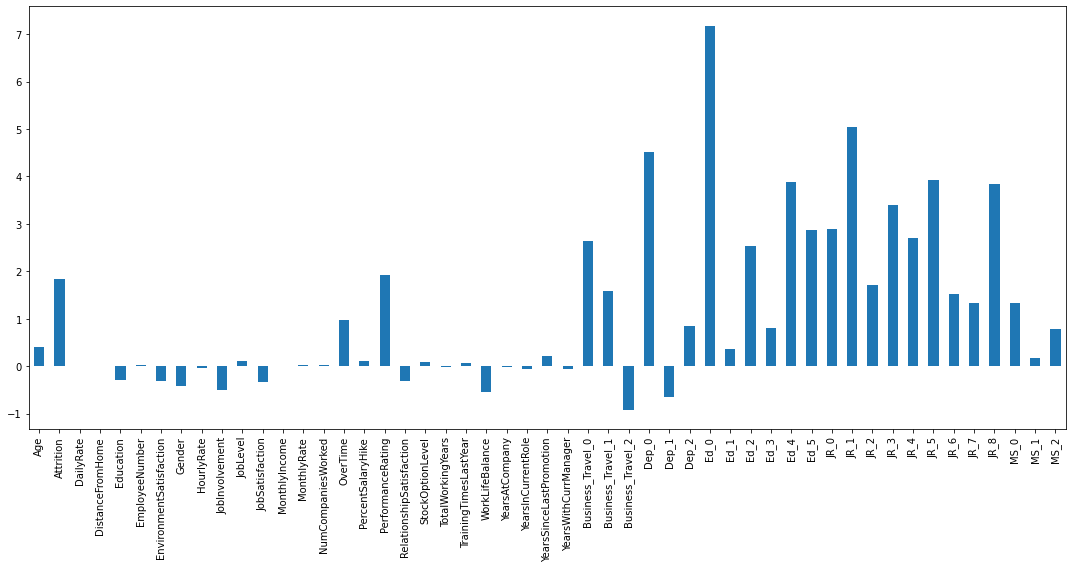

In [59]:
plt.figure(figsize=(15,8))
df.skew().plot(kind='bar')
plt.tight_layout()
plt.show()

In [60]:
#Bifurcate features and target
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [61]:
#Scale the data
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [62]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        ac=accuracy_score(y_test,predict)
        if ac>max_score:
            max_score=ac
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [63]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.9094650205761317 with random state 73


In [64]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.8765432098765432 with random state 73


In [65]:
#Call the function
model_select(SVC())

Max score is 0.9012345679012346 with random state 73


In [66]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.8827160493827161 with random state 57


In [67]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.8888888888888888 with random state 64


In [68]:
#As seen from the above results SVC is working best with our data
sc=SVC()

In [69]:
#TraintestSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=73)

In [70]:
#Perform crossvalidation on data to check over/under fitting
cross_val_score(sc,X_train,y_train,cv=4).mean()
#Model is not over/underfitted

0.8516260162601627

In [71]:
#HyperParameter Tuning
paramgrid={'C':[1,10,20,30,40,60,80,100,150,200,250,300,350,400]}
gscv=GridSearchCV(SVC(),paramgrid)

In [72]:
#Fit data with GridSearchCV
gscv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 60, 80, 100, 150, 200, 250,
                               300, 350, 400]})

In [73]:
#C Parameter is working best with default values
gscv.best_params_

{'C': 1}

In [74]:
#Fit data with SVC model
sc.fit(X_train,y_train)

SVC()

In [75]:
#Predict data
predict=sc.predict(X_test)

In [76]:
print(classification_report(y_test,predict))
print()
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       414
           1       0.96      0.35      0.51        72

    accuracy                           0.90       486
   macro avg       0.93      0.67      0.73       486
weighted avg       0.91      0.90      0.88       486


[[413   1]
 [ 47  25]]


In [77]:
#Let us plot the results
y_test.shape

(486,)

In [78]:
predict.shape

(486,)

In [79]:
result=pd.DataFrame(y_test)
result

,Attrition
487,0
102,1
67,0
1286,0
498,0
...,...
298,0
1028,0
1105,0
250,1


In [80]:
result=pd.concat([result.reset_index().drop('index',axis=1),pd.DataFrame(predict)],axis=1)

In [81]:
result.columns=['Original','Predicted']

In [82]:
result['T_F']=np.where(result['Original']==result['Predicted'],True,False)

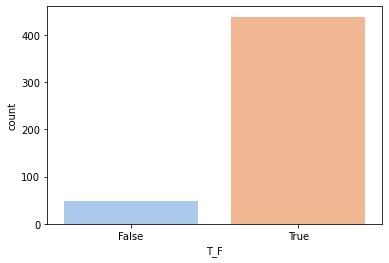

In [83]:
sns.countplot(x='T_F',data=result,palette='pastel')

In [84]:
joblib.dump(sc,'Analytics_SC.obj')

['Analytics_SC.obj']